Diabetes Prediction 
by Asim Sheikh 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Importing Dataset File
diabetes_dataset = pd.read_csv('/content/sample_data/diabetes_prediction_dataset.csv')

In [3]:
#First 5 rows of dataset
diabetes_dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
#Last 5 rows of dataset
diabetes_dataset.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [5]:
#Some info about dataset
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
#Total enteries and columns in dataset
diabetes_dataset.shape

(100000, 9)

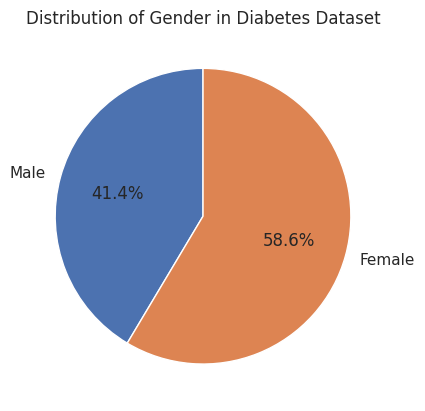

In [7]:
#Male and Female Percentage
sns.set(style="darkgrid")
gender_counts = diabetes_dataset['gender'].value_counts()
gender_counts_filtered = gender_counts.loc[['Male', 'Female']]
# Create the pie chart
plt.pie(gender_counts_filtered, labels=gender_counts_filtered.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Gender in Diabetes Dataset')
plt.show()

<Axes: xlabel='gender', ylabel='count'>

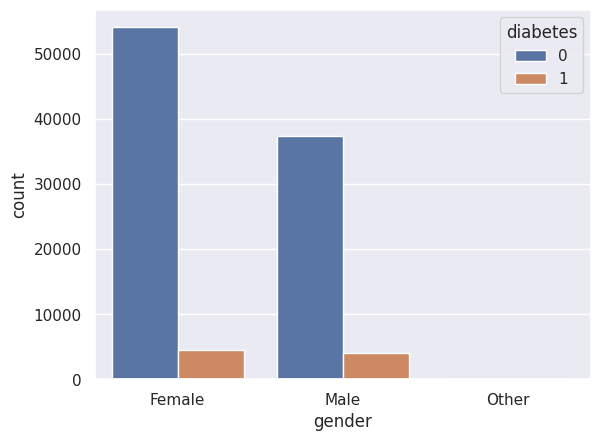

In [8]:
sns.countplot(x='gender', hue='diabetes', data=diabetes_dataset)

In [9]:
#Total enteries for no smoking
smoking_counts = diabetes_dataset['smoking_history'].value_counts()
print("Total entries for 'no info' smoking history:", smoking_counts.get('No Info', 0))

Total entries for 'no info' smoking history: 35816


In [10]:
#Dropping column no smoking
data = diabetes_dataset.drop('smoking_history', axis=1)

In [11]:
#Checking null values
null_values = data.isnull().sum()

print(null_values)

gender                 0
age                    0
hypertension           0
heart_disease          0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [12]:
#Total enteries and columns
data.shape

(100000, 8)

In [13]:
#Checking duplicate enteries
duplicate_entries = data.duplicated()

print(duplicate_entries)

0        False
1        False
2        False
3        False
4        False
         ...  
99995     True
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool


In [14]:
#Dropping duplicate enteries
data.drop_duplicates(inplace=True)

In [15]:
#Total enteries and columns
data.shape

(91313, 8)

In [ ]:
data.tail()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
99994,Female,36.0,0,0,24.60,4.8,145,0
99996,Female,2.0,0,0,17.37,6.5,100,0
99997,Male,66.0,0,0,27.83,5.7,155,0
99998,Female,24.0,0,0,35.42,4.0,100,0
99999,Female,57.0,0,0,22.43,6.6,90,0


In [16]:
#Some info about dataset
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,91313.000000,91313.000000,91313.000000,91313.000000,91313.000000,91313.000000,91313.000000
mean,41.655264,0.081193,0.042688,27.322477,5.538653,138.449246,0.092473
std,22.611466,0.273133,0.202155,6.943647,1.077192,41.180929,0.289694
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,23.000000,0.000000,0.000000,23.100000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.000000,0.000000,30.200000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


0 -> Non-Diabetic
1 -> Diabetic

In [17]:
data['diabetes'].value_counts()

0    82869
1     8444
Name: diabetes, dtype: int64

In [18]:
data.groupby('diabetes').mean()

<ipython-input-18-0f8e6fe4a4ff>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('diabetes').mean()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
diabetes,,,,,,
0,39.697645,0.064343,0.031761,26.843941,5.396334,132.782572
1,60.867243,0.246566,0.149929,32.018806,6.935362,194.061701


In [19]:
#Selecting 4 features for prediction
X_columns = ['hypertension', 'heart_disease', 'bmi','HbA1c_level']
y_column = 'diabetes'

In [20]:
X = data[X_columns]
y = data[y_column]
print(X)

       hypertension  heart_disease    bmi  HbA1c_level
0                 0              1  25.19          6.6
1                 0              0  27.32          6.6
2                 0              0  27.32          5.7
3                 0              0  23.45          5.0
4                 1              1  20.14          4.8
...             ...            ...    ...          ...
99994             0              0  24.60          4.8
99996             0              0  17.37          6.5
99997             0              0  27.83          5.7
99998             0              0  35.42          4.0
99999             0              0  22.43          6.6

[91313 rows x 4 columns]


In [21]:
#Splitting data in train and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(91313, 4) (73050, 4) (18263, 4)


Logistic Regression

In [22]:
model = LogisticRegression()

#Training data
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate the accuracy,mae,mse,r2score for test data
lr_accuracy_test = accuracy_score(y_test, y_test_pred)
lr_mae_test = mean_absolute_error(y_test, y_test_pred)
lr_mse_test = mean_squared_error(y_test, y_test_pred)
lr_r2_test = r2_score(y_test, y_test_pred)


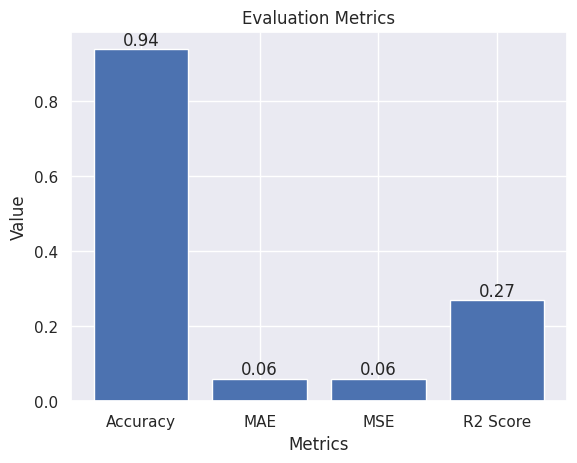

In [23]:
metrics = ['Accuracy', 'MAE', 'MSE', 'R2 Score']
values = [lr_accuracy_test, lr_mae_test, lr_mse_test, lr_r2_test]

plt.bar(metrics, values)
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Evaluation Metrics')

# Add the values on top of each bar
for i, v in enumerate(values):
    plt.text(i, v, "{:.2f}".format(v), ha='center', va='bottom')

# Show the plot
plt.show()

Naive Bayes

In [24]:
naive_bayes = GaussianNB()

#Training data
naive_bayes.fit(X_train, y_train)

Y_train_pred = naive_bayes.predict(X_train)
Y_test_pred = naive_bayes.predict(X_test)

# Calculate the accuracy,mae,mse,r2score for test data
nb_accuracy_test = naive_bayes.score(X_test, y_test)
nb_mae_test = mean_absolute_error(y_test, y_test_pred)
nb_mse_test = mean_squared_error(y_test, y_test_pred)
nb_r2_test = r2_score(y_test, y_test_pred)


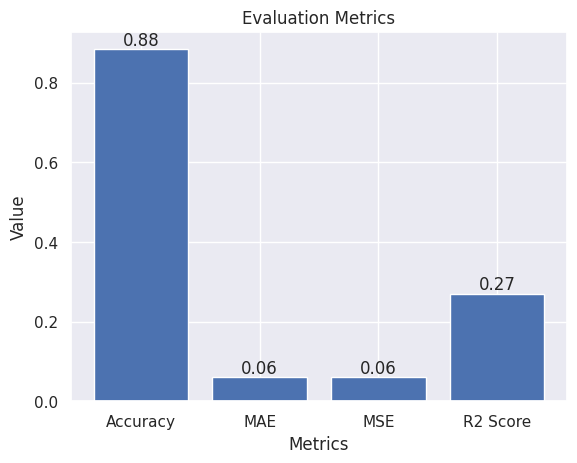

In [25]:
metrics = ['Accuracy', 'MAE', 'MSE', 'R2 Score']
values = [nb_accuracy_test, nb_mae_test, nb_mse_test, nb_r2_test]

plt.bar(metrics, values)
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Evaluation Metrics')

# Add the values on top of each bar
for i, v in enumerate(values):
    plt.text(i, v, "{:.2f}".format(v), ha='center', va='bottom')

# Show the plot
plt.show()

Input Features

In [26]:
# Take input values for the features
gender = input("Enter gender (1 for male, 0 for female): ")
age = input("Enter age: ")
hypertension = input("Enter hypertension (0 for No, 1 for Yes): ")
heart_disease = input("Enter heart disease (0 for No, 1 for Yes): ")
bmi = input("Enter BMI: ")
HbA1c_level = input("Enter HbA1c level: ")
blood_glucose_level = input("Enter blood glucose level: ")

# Preprocess the input values
X_input = pd.DataFrame({
    'gender': [int(gender)],
    'age': [int(age)],
    'hypertension': [int(hypertension)],
    'heart_disease': [int(heart_disease)],
    'bmi': [float(bmi)],
    'HbA1c_level': [float(HbA1c_level)],
    'blood_glucose_level': [float(blood_glucose_level)]
}, columns=X_columns)

Enter gender (1 for male, 0 for female): 1
Enter age: 23
Enter hypertension (0 for No, 1 for Yes): 1
Enter heart disease (0 for No, 1 for Yes): 1
Enter BMI: 130
Enter HbA1c level: 6.5
Enter blood glucose level: 124


Predictions

In [27]:
logistic_prediction = model.predict(X_input)
naive_bayes_prediction = naive_bayes.predict(X_input)

# Print the predictions
print("Logistic Regression Prediction:", logistic_prediction[0])
print("Naive Bayes Prediction:", naive_bayes_prediction[0])

Logistic Regression Prediction: 1
Naive Bayes Prediction: 1
